# Balancing Exploration and Exploitation and Investigating Choice Perseveration in a Dynamic Two-Armed Bandit Task
**Authors**<br>  Ana Carmen Angeles Torres, <br>  Victoria Eifert, <br> Elisa Hagensieker, <br> Pelin Kömürlüoglu
<br>

This Python notebook serves as a template for your group project on Experiment 1: Two-Armed Bandit Tasks for the course 'Modeling in Cognitive Science'.
This is the practical part of the group project where you get to implement the computational modeling workflow. In this part, you are expected to:


*   Implement at least two computational models relevant for your hypothesis. *(3 points)*
*   Simulate behavior from the two models. *(3 points)*
*   Implement a procedure for fitting the models to data. *(4 points)*
*   Implement a procedure for parameter recovery. *(5 points)*
*   (Implement a procedure for model recovery.) *(optional; 2 bonus points)*
*   Implement a model comparison. *(5 points)*.

You can gain a total of 20 points for the practical part of the group project.

**Note:** *Some of the exercises below (e.g. Model Simulation) rely on code from previous exercises (e.g., Model Implementation). In such cases, you are encouraged to rely on functions implemented for previous exercises. That is, you don't have to produce redundant code.*

For more information, you can check the task's GitHub repository:
[2 armed bandit task](https://github.com/snamazova/two_armed_bandit_task)



# Experiment Introduction

## What is the phenomenon you want to model?
We aim to model human decision-making under uncertainty by modeling decision-making behaviour in a dynamic two-armed bandit task. In particular, we focus on how participants balance exploration and exploitation when reward probabilities change over time, and whether they exhibit preservation – that is, a tendency to continue choosing the previously high-reward option even after the rewards reverse. <br>

## What is the phenomenon relevant for understanding human cognition?
Decision making under uncertainty is a core aspect of human cognition. By studying how individuals adapt to changing reward contingencies, we gain insight into underlying cognitive processes such as learning, planning, and cognitive flexibility. Understanding the balance between model-based (planning) and model-fee (habitual) processes, as well as biases like preservation, helps illuminate how people manage risk and adjust their behaviour in complex, dynamic environments.

Hypothesis:
1. Exploration vs. Exploitation Trade-Off: How do participants decide whether to stick with a previously chosen bandit or switch to the alternative option? <br>
The mode-based RL agent, which uses an internal model of state transitions and future rewards, is hypothesized to explore alternative choices only when it predicts a long-term benefit, whereas the model-free RL agent will exhibit more random exploration driven solely by immediate reward outcomes.

2. Choice Perseveration: Do participants continue choosing the initially high-reward bandit, even after the reward probabilities reverse? <br>
Participants may exhibit preservation behaviour – continuing to choose a previously high-reward bandit even after the reward probabilities reverse. We hypothesise that the model-based RL, with its incorporation of future reward estimates and a preservation bias parameter, will better capture this behaviour compared to the model-free RL approach.



By analyzing participant behavior, we aim to determine whether their choices align more with model-based or model-free RL.

## Why is this modeling method appropriate for understanding the phenomenon?
Computational modeling enables us to formalize and quantify cognitive processes underlying decision making. By implementing both a model-based and a model-free RL model, we can simulate trial-by-trial behaviour and directly relate model parameters to observable choices. This allows us to test how well each model explains key behavioural features such as exploration, exploitation, and preservation, and to infer the cognitive strategies participants might use.

## Why did we choose these modeling techniques:

**Model-Based RL:** <br>
Reasons for choosing:
- This model includes an internal transition model that can predict future rewards by considering state transitions. It adjusts to reward reversals, which could clarify strategic decision-making. <br>
- **Inputs**: Sequences of bandit choices, observed rewards, internal estimates of state transitions <br>
- **System Properties**: incorporates an internal model that predicts future rewards by considering transition probabilities. It updates action values (Q-values) using both immediate rewards and discounted future rewards <br>
- **Outputs**: Predicted probabilities of choosing each bandit on each trial
<br>

**Model-Free RL:** <br>
Reasons for choosing:

- **Input**: Sequences of choices and received rewards
- **system properties**: learns action values directly from received rewards without modeling future states. Exploration is governed by the immediate reward prediction error
- **Output**: predicted choice probabilities based solely on updated Q-values

## Which assumption does each model make?
**Model-based RL assumptions**:
- Participants possess an internal model of the environment (i.e. knowledge of or assumptions about state transitions)
- Action values are updated using both immediate rewards and an estimate of future rewards (incorporating a discount factor)
- A preservation bias may be included, reflecting a tendency to repeat previous choices even in the face of changing contingencies

**Model-free RL assumptions**:
- Decisions are based only on past rewards; there is no planning or explicit internal model
- Q-values are updated directly using the prediction error from immediate rewards
- exploration is governed by a softmax rule that introduces randomness, with no explicit mechanism for preservation



## Data Loading


**How much data were collected**:


In [1]:
import sys
sys.path.append('src')
from data_loading import *

df_merged = load_data("merged")
df_single = load_data("single")

### DataFrame Structure Overview

The DataFrame(df) contains multiple columns representing various aspects of a **two-armed bandit experiment**. Below is a breakdown of the key columns:  

## 1. General Trial Information  
- **`trial_index`**: The index of the current trial in the experiment (note: displaying the score is also considered a trial, as it is a stimulus).  
- **`trial_type`**: The type of trial, indicating how the response was made (e.g., via keyboard or mouse click).  
- **`time_elapsed`**: The total time elapsed (in milliseconds) since the start of the experiment.  
- **`internal_node_id`**: An internal identifier for the trial structure.  

## 2. Response and Stimulus Data  
- **`stimulus`**: The presented stimulus for the trial (a `<div>` tag containing the value and color of the bandit).  
- **`response`**: The participant’s response/input during the trial.  
- **`rt`**: The reaction time (in milliseconds) taken to respond.  

## 3. Task-Specific Information (Bean Task)    
- **`bean_trial_duration`**: The duration of the bean trial.  
- **`bean_duration`**: The time the bean stimulus was displayed.  
- **`bean_stimulus`**: The presented stimulus for the trial (a `<div>` tag containing the value and color of the bandit).  
- **`bean_choices`**: The available choice options in the trial.  
- **`bean_correct_key`**: The correct key (button press) for the task.  
- **`bean_type`**: The category of the bean stimulus.  
- **`bean_text`**: A text representation of the bean (if applicable).  
- **`bean_color`**: The color of the bean, which may be relevant to decision-making.  
- **`bean_correct`**: A boolean or categorical value indicating whether the response was correct.  
  - *Note:* In the bandit task, there is no strictly correct choice, as the task focuses on exploration rather than accuracy.  
- **`bean_value`**: The assigned value or reward associated with the bean (bandit).  
- **`bean_score`**: The accumulated score in the experiment.  

## 4. Additional Processing Data  
- **`bean_html_array`**: An HTML representation of the bean stimulus.  
- **`bean_values`**: An array containing value-related information for different beans.  
- **`bean_time_after_response`**: The time elapsed after the participant’s response.  
- **`bean_bandits`**: Information about Bandit 1 and Bandit 2 (their color and value).  


In [2]:
df_merged = processing_data(df_merged)
df_single = processing_data(df_single)

# Exlporing the data

We now explore the key behavioral variables:
1. Choice proportions:
We observe how we shift preferences over time.
2. Reward rate:
We group trials into blocks and plot the average reward.
3. Switching behavior:
We compute the probability of switching actions to test if participants follow a win-stay and lose-switch pattern.
4. Reaction time:
We plot a histogra, of RTs.


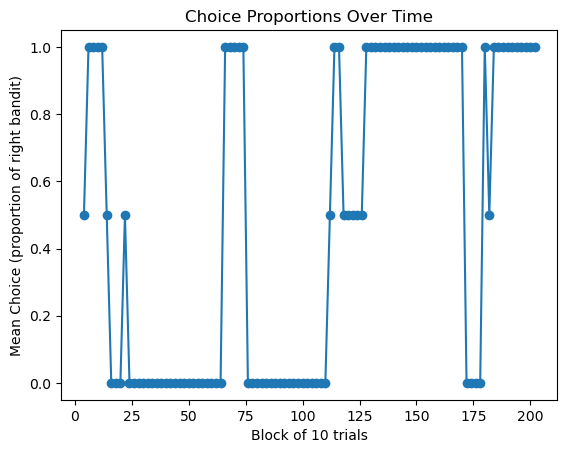

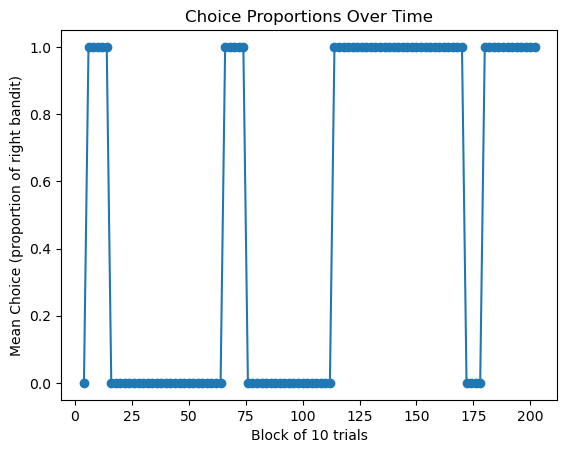

In [3]:
from explore_data import *
import pandas as pd

plot_choices_over_time(df_merged)
plot_choices_over_time(df_single)

We can observe how the proportion of choosing one bandit changes over trials. There is always a longer phase of staying with one bandit.THe subject alternates between choosing one bandit and the other bandit within the trials. This behavior coule be due to the reward changes of the task.

In [4]:
switch_win_loss(df_merged)
switch_win_loss(df_single)


Switch after Win: 0.0038314176245210726
Switch after Loss: 0.2753623188405797
Switch after Win: 0.0
Switch after Loss: 0.21212121212121213


The values indicate the proportion of trials in which a particpant switches their choices after receiving a reward of 1 or zero reward. A higher switch rate of 54.5% can be observed after a loss and we adjust our behavior. This suggests exploratory behavior where we try different options after a failure.

There is a moderate switch-after-win-rate which could indicate some level of uncertatinty in decision making.

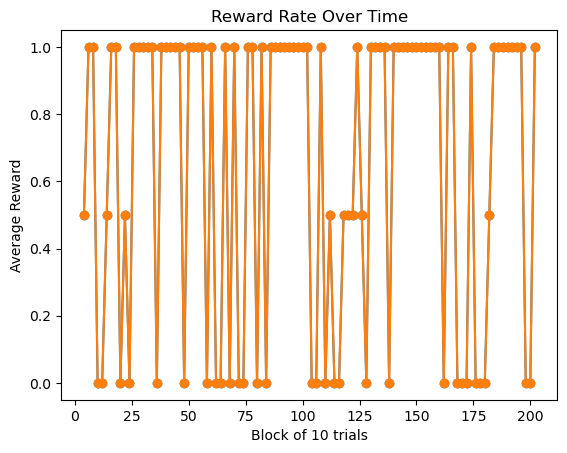

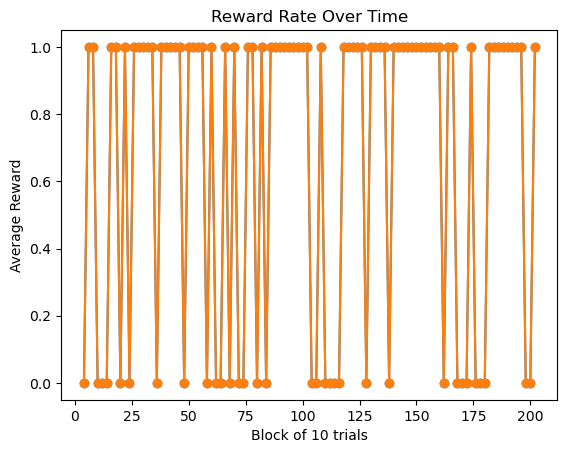

In [5]:
plot_reward_over_time(df_merged)
plot_reward_over_time(df_single)


This plot gives an indication of the overall performance across the experiment. Changes in reward might indicate adjustments in the behavior. As the environment shifts rewards between bandits there are learning disruptions leading to exploration before settling on a new optimal choice. The periods for receiving a reward of 1 are longer than for 0 reward.

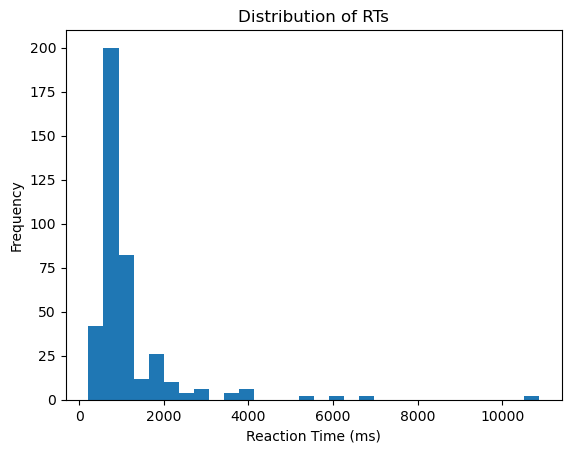

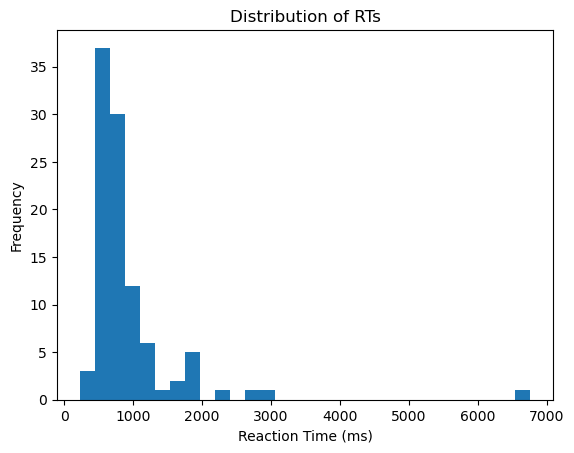

In [6]:
plot_rt(df_merged)
plot_rt(df_single)

Overall, the reaction time is mostly around 800 ms with some outliers at 3000 and 7000 ms.

## Model Implementation *(3 points)*

For this exercise you should:

*   Implement and simulate data from two* models that are suitable to test your hypothesis. *(3 points)*

<font size=2>*You may implement more than two models if you wish. However, two models are sufficient for this group project.</font>

Make sure to comment your code and provide an explanation for each code block in a preceding text block.


In [7]:
from model_based_rl import *
model_mb = ModelBasedRL()

# Model-Based RL Update Rule
Q-values are updated using the **reward prediction error (RPE)** and learned **transition probablities** (update_q_table)

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \sum_{s'} P(s' | s, a) \max_{a'} Q(s', a') - Q(s, a) \right]
$$

where: <br>
- \( Q(s, a) \) expected reward for action a in state s
- $\alpha$ - learning rate (how quickly values update)
- $\gamma$- discount factor (future reward weighting)
-  r - received reward
-  s' next state sampled using learned transition probabilities
- \( P(s' | s, a) \) - learned transition probability from state \( s \) to \( s' \) given action \( a \).
-$\max_{a'} Q(s', a')$ - maximum expected future reward

# Softmax Action Selection

The probability of choosing an action is computed using the softmax function (get_action_probabilities):

$$
P(a | s) = \frac{e^{\beta Q(s, a)}}{\sum_{a'} e^{\beta Q(s, a')}}
$$

where:
- $\beta$ - inverse temperature controlling exploration-exploitation
- higher beta -> more deterministic choices
- lower beta -> more random exploration

## Model Simulation *(3 points)*

For this exercise you should:

*   Simulate data from both models for a single set of parameters. The simulation should mimic the experiment you are trying to model. *(2 points)*

*   Plot the simulated behavior of both models. The model plots should depict key features of the behavioral data, convincing yourself that the models are suitable to capture the data. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.


['blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


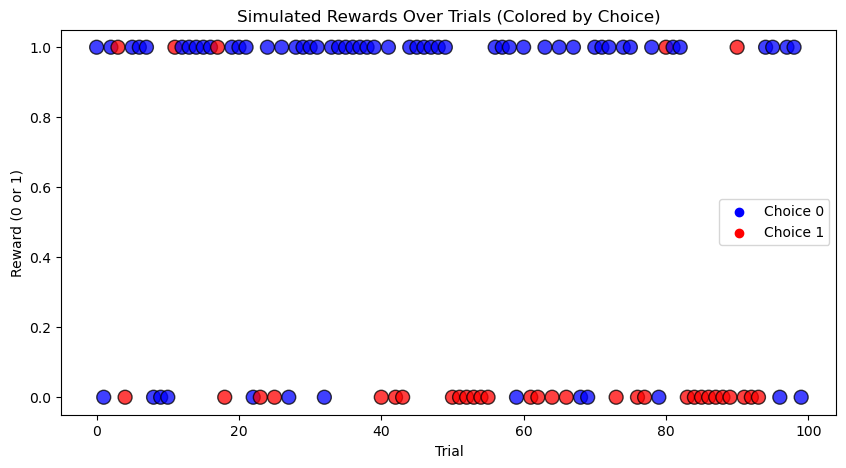

In [8]:
from explore_data import *
from model_based_rl import *
np.random.seed(42)
choices_mb, rewards_mb, model_mb = simulate_participant(trials=100, alpha=0.02, beta=0.8, gamma=0.8, theta=0.8)
plot_simulated_behavior(choices_mb, rewards_mb)

0
0
1
1
1
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
1
1
0
0
0
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
1
1
0
1
1
0
0
0
1


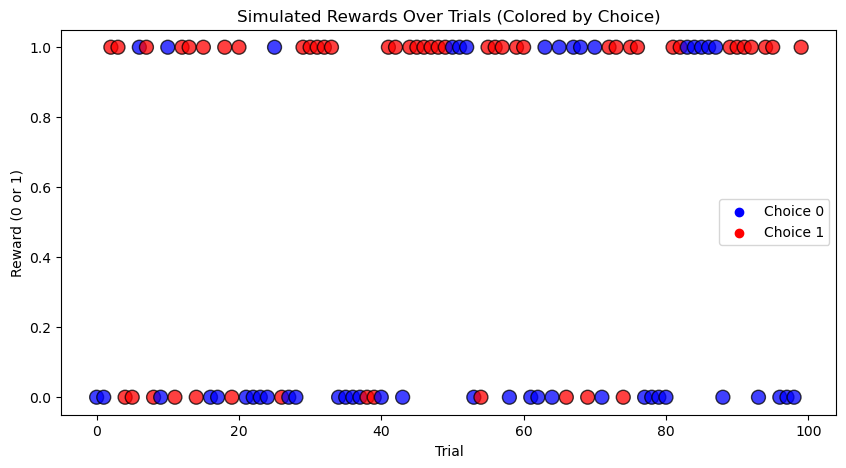

In [9]:
from model_free_rl import *
model_mf = ModelFreeRL()
choices_mf, rewards_mf, model_mf = simulate_participant_TD(trials=100, alpha=0.02, beta=0.8, gamma=0.8, theta=0.8)
plot_simulated_behavior_TD(choices_mf, rewards_mf)

# Describe the process of simulating data from the model
- simulate_participant() from model_based_rl.py:
  - the model chooses actions via softmax selection
  - rewards are sampeld based on probabilistic bandit rewards
  - Q-values are updated using the model
  - the agent's transition probabilities are dynamically updated

The simulated behavior plot shows the sequence of choices (which bandit was chosen) and the rewards received.
By visually comparing this to the empirical plots, we can get a sense of whether the model captures key patterns in the data.

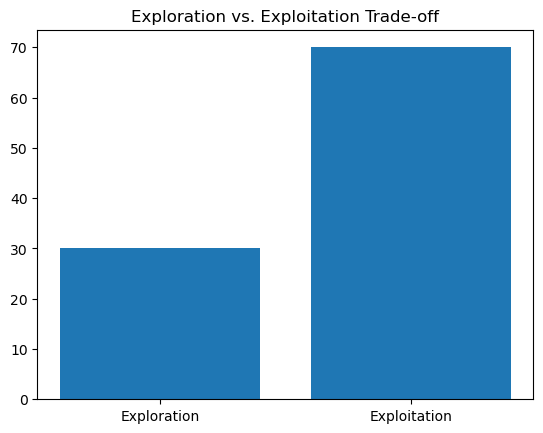

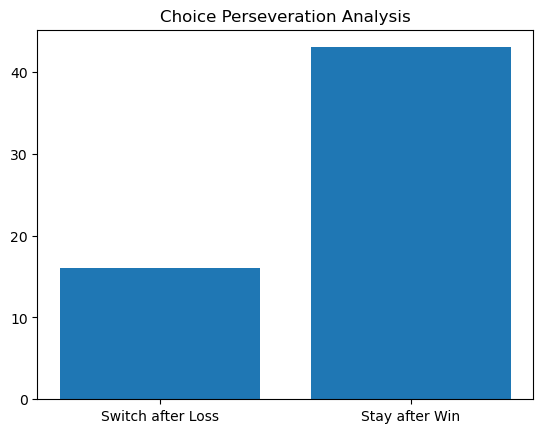

In [10]:
# analyze exploration-exploitation tradeoff
exploration_mb, exploitation_mb = analyze_exploration_exploitation(choices_mb)
plt.bar(['Exploration', 'Exploitation'], [exploration_mb, exploitation_mb])
plt.title('Exploration vs. Exploitation Trade-off')
plt.show()

# analyze choice-preservation
switch_loss, stay_win = analyze_choice_perseveration(choices_mb, rewards_mb)
plt.bar(['Switch after Loss', 'Stay after Win'], [switch_loss, stay_win])
plt.title('Choice Perseveration Analysis')
plt.show()


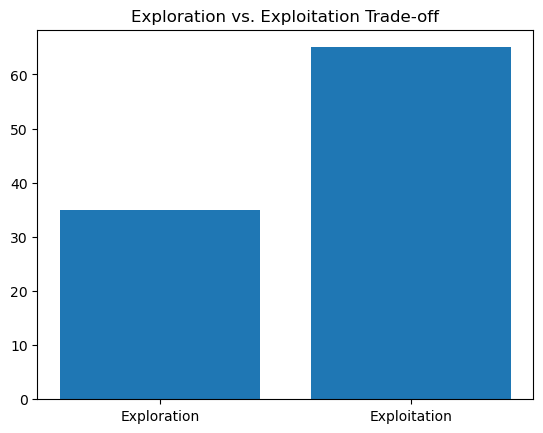

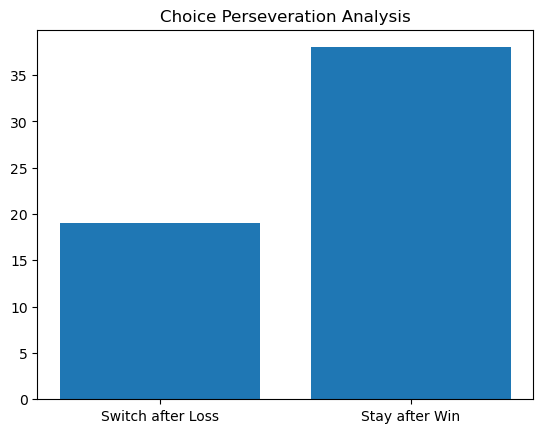

In [11]:
# analyze exploration-exploitation tradeoff
exploration_mf, exploitation_mf = analyze_exploration_exploitation(choices_mf)
plt.bar(['Exploration', 'Exploitation'], [exploration_mf, exploitation_mf])
plt.title('Exploration vs. Exploitation Trade-off')
plt.show()

# analyze choice-preservation
switch_loss, stay_win = analyze_choice_perseveration(choices_mf, rewards_mf)
plt.bar(['Switch after Loss', 'Stay after Win'], [switch_loss, stay_win])
plt.title('Choice Perseveration Analysis')
plt.show()


## Parameter Fitting *(4 points)*

For this exercise you should:

*   Set up a suitable parameter search space *(1 point)*

*   Implement a procedure to evaluate the fit of a model based on data *(2 points)*

*   Implement a procedure for searching the parameter space. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.



What we should test:
1. Exploration-Exploitation: low betha more exploration; high betha more exploitation

2. choice preservation: high gamma repeating past choices; low gamma more flexible after changing rewards

# Fitting
- Log-likelihood estimation: computes how well the models predicted choices match the observed data
- Grid search: searches across $\alpha$, $\beta$ and $\gamma$ to find the best-fitting parameters.

In [12]:
from parameter_fitting import *
np.random.seed(42)
simulated_data = simulate_data_for_fitting()
optimized_params, best_likelihood = grid_search_parameter_fit(simulated_data)
print(f"Optimized Parameters: Alpha={optimized_params[0]}, Beta={optimized_params[1]}, Theta={optimized_params[2]}")
print(f"Best Log-Likelihood: {best_likelihood:.3f}")


Optimized Parameters: Alpha=0.4444444444444444, Beta=10.0, Theta=1.0
Best Log-Likelihood: -0.693


In [13]:
from parameter_fitting import *
np.random.seed(42)
simulated_data_mf = simulate_mfrl_trials()
optimized_params_mf, best_likelihood_mf = grid_search_parameter_fit_mf(simulated_data_mf)
print(f"Optimized Parameters: Alpha={optimized_params_mf[0]}, Beta={optimized_params_mf[1]}, Theta={optimized_params_mf[2]}")
print(f"Best Log-Likelihood: {best_likelihood_mf:.3f}")



Optimized Parameters: Alpha=0.1111111111111111, Beta=4.5, Theta=0.11111111111111116
Best Log-Likelihood: -40.860


## Parameter Recovery *(5 points)*

For this exercise you should:

*   Set up a suitable space of parameters relevant for parameter recovery *(1 point)*

*   Use the functions above to generate behavior from a models, for a given set of (randomly sampled) parameters, and then fit the model to its generated data. Make sure to evaluate the parameter fit in a quantiative manner. *(3 points)*

*   Plot the parameter recovery results for both models. *(1 point)*

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





We test whether our fitting procedure can recover known parameters (parameter_recovery in parameter_recovery.py).
We simulate data from multiple sets of randomly sampled parameters (simulate_data_for_fitting imported in parameter_fitting.py), fit the model (grid_search_parameter_fit from parameter_fitting),
and then evaluate the recovery with correlations and mean absolute error (evaluate_parameter_fit in parameter_recovery).

The recovered parameters are plotted next (plot_param_recovery in parameter_recovery.py)

Alpha Correlation: 0.333, Alpha MAE: 0.246
Beta Correlation: 0.784, Beta MAE: 1.895
Theta Correlation: 0.745, Theta MAE: 0.231


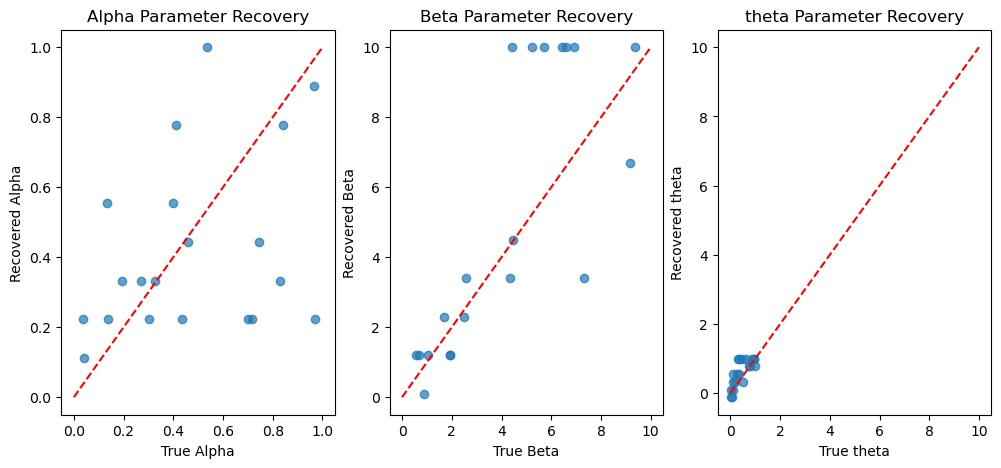

In [14]:
from parameter_recovery import *
# Run parameter recovery and evaluation
true_params, recovered_params = parameter_recovery()
evaluate_parameter_fit(true_params, recovered_params)
plot_param_recovery(true_params, recovered_params)


Alpha Correlation: 0.276, Alpha MAE: 0.288
Beta Correlation: 0.094, Beta MAE: 3.691
Theta Correlation: 0.214, Theta MAE: 0.333


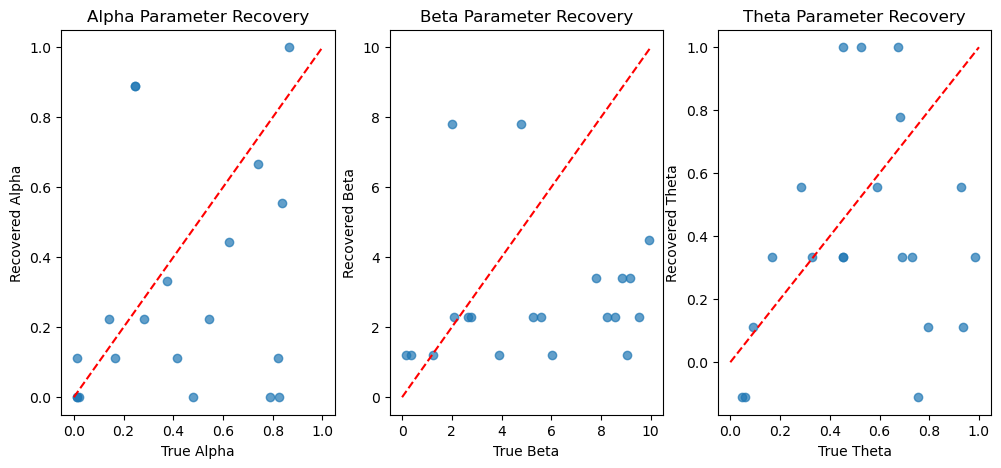

In [15]:
true_params_mf, recovered_params_mf = parameter_recovery_mfrl()
evaluate_parameter_fit_mfrl(true_params_mf, recovered_params_mf)
plot_param_recovery_mfrl(true_params_mf, recovered_params_mf)

## *Optional*: Model Recovery *(2 bonus points)*

In this bonus exercise, you may examine model reovery. The bonus points count towards your total group project points. That is, you may accumlate up to 22 points in the practical part of the group project.

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





In [1]:
# YOUR MODEL RECOVERY CODE GOES HERE
import sys
sys.path.append('src')
from model_recovery import *

model_recovery_experiment()

Model recovery accuracy: 66.00%


,True Model,Recovered Model
0,model_based,model_free
1,model_free,model_free
2,model_free,model_based
3,model_based,model_based
4,model_based,model_based
...,...,...
95,model_free,model_based
96,model_based,model_based
97,model_based,model_free
98,model_free,model_free


## Model Comparison *(5 points)*

For this exercise you should:

*   Load and (potentially) preprocess the experimental data. (1 point)

*   Fit the two models to the data.  *(1 point)*

*   Evaluate which model performs better, taking into account fit and model complexity. *(2 points)*

*   Plot the behavior of the winning model against the data. *(1 point)**

Make sure to comment your code and provide an explanation for each code block in a preceding text block.





Model-Based Log-Likelihood: -13.655200226344556
Model-Free Log-Likelihood: -13.919494090492286
Model-Based RL performs better


,Model,BIC
0,Model-Free,41.654499
1,Model-Based,41.125911


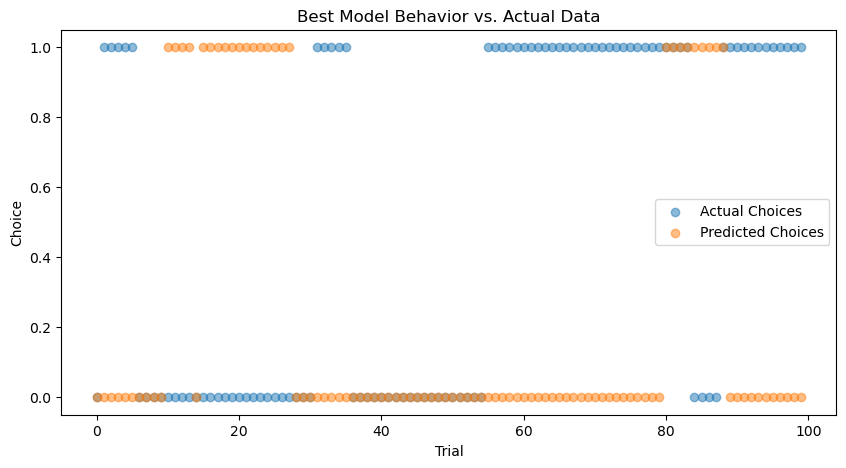

In [7]:
import sys
sys.path.append('src')
from model_comparison import *

run_model_comparison("single")

Model-Based Log-Likelihood: -70.6798912860979
Model-Free Log-Likelihood: -73.10356157832211
Model-Based RL performs better


,Model,BIC
0,Model-Free,164.181517
1,Model-Based,159.334176


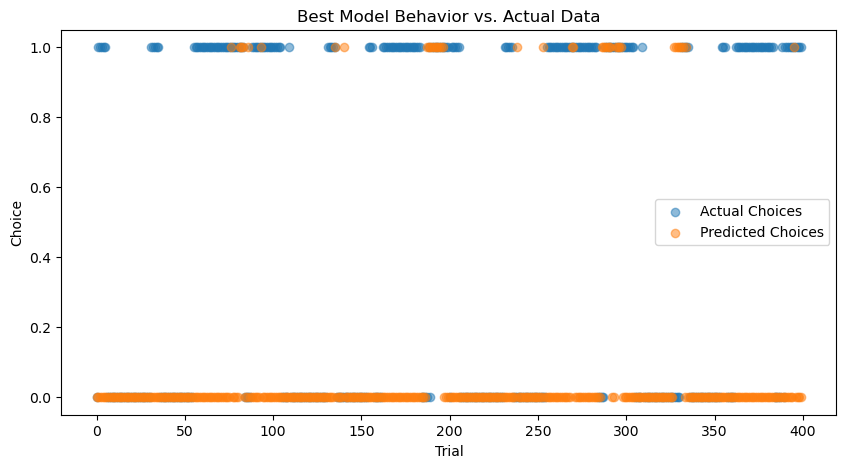

In [8]:
run_model_comparison("merged")

Test model on held-out dataset